An object emits a blob of material at speed v at an angle $\theta$ to the line-of sight of a distant observer(see figure1).

Input labraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Set up the figure, the axis, and the plot element to show comparasion among distance, speed and apparent ones. 
Here $\beta$ and $\beta_{app}$ are the speed and apparent one divided by speed of light repectively

Text(0.5, 0, '$\\beta$')

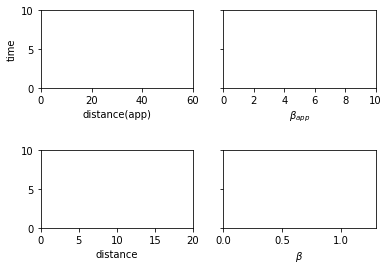

In [2]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2,2,
                                 sharex=False,
                                 sharey=True,
                                  tight_layout=False)
fig.subplots_adjust(hspace=0.8)

ax11.set_xlim((0,60))
ax11.set_ylim((0,10))
ax11.set_xlabel('distance(app)')
ax11.set_ylabel('time')

ax12.set_xlim((0,10))
ax12.set_xlabel(r'$\beta_{app}$')

ax21.set_xlim((0,20))
ax21.set_xlabel('distance')

ax22.set_xlim((0,1.3))
ax22.set_xlabel(r'$\beta$')

Define varables, range and relations. Relation between $\beta$ and $\beta_{app}$ :
$\beta_{app}=\frac{\beta sin\theta}{1-\beta cos\theta}$
Here speed of the object is fixed($\gamma=2$) while the observation angle $\theta$ varies.

In [3]:
t=np.linspace(0,10,1000)
gamma=2
theta=np.pi/10
beta_t=(1-gamma**(-2))**0.5
beta_app_t=beta_t*np.sin(theta)/(1-beta_t*np.cos(theta))
line11, = ax11.plot(beta_app_t*t,t,lw=2)

tt=t*0+1
beta_app=beta_app_t+t*0
line12, = ax12.plot(beta_app,t,lw=2)

beta=beta_t+t*0
line21, = ax21.plot(beta*t,t,lw=2)

line22, =ax22.plot(beta,t,lw=2)

Make legends for every subplot to denote light-like curve in light cone plot and speed of light in 'time vs speed' plot 

In [4]:
ax11.plot(t,t, label='lightcone edge 1', color='red', linestyle='--')
ax12.plot(tt,t, label='speed of light 1', color='pink', linestyle='--')
ax21.plot(t,t, label='light cone edge 2', color='green', linestyle='--')
ax22.plot(tt,t, label='speed of light 2', color='purple', linestyle='--')

ax11.legend(loc='lower right')
ax12.legend(loc='upper right')
ax21.legend(loc='lower right')
ax22.legend(loc='upper left')

Define initialization functions for every curves

In [5]:
def init():
    line11.set_xdata(0)
    line12.set_xdata(0)
    line21.set_xdata(0)
    line22.set_xdata(0)
    return (line11, line12, line21, line22,)

Define animation functions for every curves

In [6]:
def animate(i):
    gamma=2
    theta=np.pi*0.01*i
    beta_t=(1-gamma**(-2))**0.5
    beta_app_t=abs(np.sin(theta))*beta_t/(1-beta_t*abs(np.cos(theta)))
    beta_app=beta_app_t+t*0
    beta=beta_t+t*0
    
    line11.set_xdata(beta_app*t)
    line12.set_xdata(beta_app)
    line21.set_xdata(beta*t)
    line22.set_xdata(beta)
    
    ax11.set_title(r'$\theta$=' + '{:03.2}'.format(theta))
    ax12.set_title(r'$\beta_{app}$ vs time')
    ax22.set_title(r'$\beta$ vs time')
    ax21.set_title(r'$\beta$=' + '{:03.2}'.format(beta_t))
    
    return(line11, line12, line21, line22,)

Compile the animation. Setting blit=False will re-draw all the parts that have changed

In [7]:
anim=animation.FuncAnimation(fig=fig, func=animate, init_func=init,
                             frames=200, interval=50,
                             blit=False)

Now to create an interactive JavaScript widget using the to_jshtml method.
From the animation below, we will see apparent speed of the object is able to exceed light speed when observation angle can be chosen to be some special ones. As if its motion was able to be space-like.
However, what happens in real for the object is its speed is below light's and its motion is time-like.

In [8]:
HTML(anim.to_jshtml())